# Введение в нейронные сети

## Эпизод 1: Персептрон

Дмитрий Сошников

технологический евангелист, Microsoft

dmitryso@microsoft.com

Данная презентация представляет собой введение в нейронные сети. Идея однодневного мастер-класса основана на Neural Network Workshop в Microsoft Research Cambridge. Материал и фрагменты кода частично взяты из презентаций [Katja Hoffmann](https://www.microsoft.com/en-us/research/people/kahofman/), [Matthew Johnson](https://www.microsoft.com/en-us/research/people/matjoh/) и [Ryoto Tomioka](https://www.microsoft.com/en-us/research/people/ryoto/) из Microsoft Research Cambridge. [NeuroWorkshop](http://github.com/shwars/NeuroWorkshop) подготовлен [Дмитрием Сошниковым](http://blog.soshnikov.com), Microsoft Russia.

## Два взгляда на нейронные сети

 * Восходящий подход к искусственному интеллекту
 * Способ усложнения и комбинирования базовых алгоритмов машинного обучения
     - обучение с учителем (*supervised learning*)
     - обучение без учителя (*unsupervised learning*)

## Обучение с учителем

**Дано:**
  * Обучающая выборка $\mathbf{X} \in \mathbb{R}^{n \times k}$
    * $n$ - размер выборки
    * $x_i$ представлено вектором свойств размерности $k$
  * Известные значения целевой функции $\mathbf{Y}$ ($y_i$ соответствует вектору свойств $x_i$)
    * $\mathbf{Y} \in \mathbb{R}^{n \times 1}$ (задачи регрессии)
    * $\mathbf{Y} \in C^{n \times 1}$, где $y_i \in C$ (задачи классификации на $|C|$ классов)


## Задача

**Дано:**
  * Обучающая выборка $\mathbf{X} \in \mathbb{R}^{n \times k}$
  * Входные значение целевой функции $\mathbf{Y}$

**Необходимо построить:**
  * Функцию $f : \mathbf{X} \rightarrow \mathbf{Y}$ который _точно предсказывает_ значение целевой функции на новом наборе входных данных $\mathbf{X}_{new}$


**[matplotlib.gridspec](https://matplotlib.org/stable/api/gridspec_api.html)** - содержит классы, которые помогают размещать несколько осей в виде сетки в пределах фигуры

**[sklearn (Scikit-learn)](https://scikit-learn.org/stable/)** - один из наиболее широко используемых пакетов **Python** для **Data Science** и **Machine Learning**. Он позволяет выполнять множество операций и предоставляет множество алгоритмов)

Установка **Scikit-learn**:
- `conda install -c anaconda scikit-learn`

Модуль **[sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)** включает в себя утилиты для загрузки наборов данных, включая методы для загрузки и получения популярных справочных наборов данных. Также есть несколько генераторов искусственных данных

**[sklearn.datasets.make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html?highlight=make_classification#sklearn.datasets.make_classification)** модуль для создания случайных задач классификации n-классов

Модуль **[pickle](https://docs.python.org/3/library/pickle.html)** реализует двоичные протоколы для сериализации и десериализации структуры объекта **Python**

Mодуль **[random](https://docs.python.org/3/library/random.html)** реализует генераторы псевдослучайных чисел для различных распределений

In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.datasets import make_classification
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import pickle
import os


# инициализация генератора случайных чисел
np.random.seed(1)
import random

## Пример
Рассмотрим пример двухмерной задачи классификации на 2 класса. Примером такой задачи может быть классификация опухоли на 2 типа - доброкачественная и злокачественная, в зависимости от её размера и возраста.

In [7]:
# размер выборки
n = 50

# генерация задачи классификации:
# n_samples - количество объектов задачи классификаци
# n_features - общее количество признаков у объектов
# n_redundant - количество неинформативных (избыточных) признаков
# n_informative - количество информативных признаков)
# flip_y - количество объектов в долях (от 0 до 1), которым класс присвоен случайно
# X - сгенерированная выборка в виде массива признаков объектов
# Y - массив целых чисел - соответствие объекта к классу 
X, Y = make_classification(n_samples = n, n_features=2,
                           n_redundant=0, n_informative=2, flip_y=0)
print(f'Признаки объектов:\n {X}')
print(f'Классы объектов:\n {Y}')

Признаки объектов:
 [[ 1.4073035   0.96076371]
 [-1.59004286 -1.4035089 ]
 [ 0.93604653 -1.21023732]
 [ 1.14241451  0.54125195]
 [-1.75119051  1.15537626]
 [ 0.26569116 -0.22919697]
 [ 1.05358338  0.34946185]
 [ 0.66456387  0.13812476]
 [-1.93548727 -1.34450489]
 [ 1.69474721  1.11680836]
 [ 0.30602265  0.80005223]
 [-0.9957266   1.0217206 ]
 [ 0.99969015  0.68630973]
 [-0.7908847  -0.99048735]
 [-0.6337448   1.0424909 ]
 [ 0.88149492 -2.75583803]
 [-2.33858458  1.17265293]
 [-1.83530989  1.02662168]
 [ 1.95863456  0.85551182]
 [-2.15161235 -1.58509588]
 [ 1.22482658  0.52690836]
 [ 0.27290221  0.91360878]
 [-1.86928842 -1.57992221]
 [-0.02416015 -0.33862698]
 [ 0.94447693 -2.11718001]
 [ 1.02556069 -0.07476384]
 [ 1.17853262 -0.35217866]
 [ 1.0958732   1.35072696]
 [-0.31548079  0.87001786]
 [ 2.27184392  0.79321006]
 [-1.63800076  1.15858469]
 [ 1.04517722  0.58303897]
 [ 1.01856431 -1.01189818]
 [-0.74688707  0.96638049]
 [-0.57342981 -0.6916509 ]
 [-0.38385209  1.04606741]
 [ 1.164

In [8]:
# бинаризация ответов задачи классификации
Y = Y*2-1
print(f'Ответы задачи бинарной классификации:\n {Y}')

Ответы задачи бинарной классификации:
 [ 1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1
  1  1  1  1 -1  1 -1  1  1 -1 -1  1  1 -1 -1  1 -1  1  1  1 -1  1  1  1
 -1 -1]


In [10]:
# типизация массивов данных
X = X.astype(np.float32); 
Y = Y.astype(np.int32)

print(f'Признаки объектов:\n {X}')
print(f'Ответы бинарной классификации:\n {Y}')

Признаки объектов:
 [[ 1.4073035   0.9607637 ]
 [-1.5900428  -1.4035089 ]
 [ 0.93604654 -1.2102373 ]
 [ 1.1424146   0.54125196]
 [-1.7511905   1.1553763 ]
 [ 0.26569116 -0.22919697]
 [ 1.0535834   0.34946185]
 [ 0.6645639   0.13812476]
 [-1.9354873  -1.3445048 ]
 [ 1.6947472   1.1168084 ]
 [ 0.30602264  0.8000522 ]
 [-0.9957266   1.0217206 ]
 [ 0.9996902   0.68630975]
 [-0.7908847  -0.99048734]
 [-0.6337448   1.0424908 ]
 [ 0.88149494 -2.755838  ]
 [-2.3385847   1.172653  ]
 [-1.8353099   1.0266217 ]
 [ 1.9586346   0.85551184]
 [-2.1516123  -1.5850959 ]
 [ 1.2248266   0.52690834]
 [ 0.27290222  0.9136088 ]
 [-1.8692884  -1.5799222 ]
 [-0.02416015 -0.33862698]
 [ 0.9444769  -2.11718   ]
 [ 1.0255607  -0.07476384]
 [ 1.1785326  -0.35217866]
 [ 1.0958732   1.350727  ]
 [-0.3154808   0.8700179 ]
 [ 2.271844    0.79321   ]
 [-1.6380007   1.1585847 ]
 [ 1.0451772   0.583039  ]
 [ 1.0185643  -1.0118982 ]
 [-0.7468871   0.9663805 ]
 [-0.5734298  -0.6916509 ]
 [-0.3838521   1.0460674 ]
 [ 1.164

In [12]:
# Разбиваем на обучающую и тестовые выборки. В реальной жизни обучающая - 80% данных
train_x, test_x = np.split(X, [ n*8//10])
train_labels, test_labels = np.split(Y, [n*8//10])
print(f'Обучающая выборка объектов:\n {train_x}')
print(f'Обучающая выборка ответов:\n {train_labels}')
print(f'Тестовая выборка объектов:\n {test_x}')
print(f'Тестовая выборка ответов:\n {test_labels}')

Обучающая выборка объектов:
 [[ 1.4073035   0.9607637 ]
 [-1.5900428  -1.4035089 ]
 [ 0.93604654 -1.2102373 ]
 [ 1.1424146   0.54125196]
 [-1.7511905   1.1553763 ]
 [ 0.26569116 -0.22919697]
 [ 1.0535834   0.34946185]
 [ 0.6645639   0.13812476]
 [-1.9354873  -1.3445048 ]
 [ 1.6947472   1.1168084 ]
 [ 0.30602264  0.8000522 ]
 [-0.9957266   1.0217206 ]
 [ 0.9996902   0.68630975]
 [-0.7908847  -0.99048734]
 [-0.6337448   1.0424908 ]
 [ 0.88149494 -2.755838  ]
 [-2.3385847   1.172653  ]
 [-1.8353099   1.0266217 ]
 [ 1.9586346   0.85551184]
 [-2.1516123  -1.5850959 ]
 [ 1.2248266   0.52690834]
 [ 0.27290222  0.9136088 ]
 [-1.8692884  -1.5799222 ]
 [-0.02416015 -0.33862698]
 [ 0.9444769  -2.11718   ]
 [ 1.0255607  -0.07476384]
 [ 1.1785326  -0.35217866]
 [ 1.0958732   1.350727  ]
 [-0.3154808   0.8700179 ]
 [ 2.271844    0.79321   ]
 [-1.6380007   1.1585847 ]
 [ 1.0451772   0.583039  ]
 [ 1.0185643  -1.0118982 ]
 [-0.7468871   0.9663805 ]
 [-0.5734298  -0.6916509 ]
 [-0.3838521   1.0460674 ]

**[matplotlib.pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=subplots#matplotlib.pyplot.subplots)** - создание фигуры и набора осей для графиков 

**[matplotlib.pyplot.suptitle](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html?highlight=suptitle#matplotlib.pyplot.suptitle)** - добавление заголовка к фигуре по центру

**[matplotlib.axes.Axes.set_xlabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html?highlight=set_xlabel#matplotlib.axes.Axes.set_xlabel)** - установление метки (название) для оси X

**[matplotlib.axes.Axes.set_ylabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html?highlight=set_ylabel#matplotlib.axes.Axes.set_ylabel)** - установление метки (названия) для оси Y

**[matplotlib.axes.Axes.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html?highlight=scatter#matplotlib.axes.Axes.scatter)** - диаграмма разброса **y** по **x** с разным размером и/или цветом маркера

**[matplotlib.pyplot.subplots_adjust](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html?highlight=subplots_adjust#matplotlib.pyplot.subplots_adjust)** - настройте параметры компоновки подзаголовка

In [13]:
# функция вывода графика разброса объектов по классам
# suptitle - название фигуры
# features - признаки объектов
# labels - метки (названия) осей
def plot_dataset(suptitle, features, labels):
    # подготовка графиков
    fig, ax = plt.subplots(1, 1)
    #plt.subplots_adjust(bottom=0.2, wspace=0.4)
    fig.suptitle(suptitle, fontsize = 16)
    
    # установление меток по осям осям
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')

    # установление цвета для различных классов 
    colors = ['r' if l>0 else 'b' for l in labels]
    
    # построение графика
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha = 0.5)
    
    # вывод фигуры
    fig.show()

<ipython-input-13-35f5edcc7d6e>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


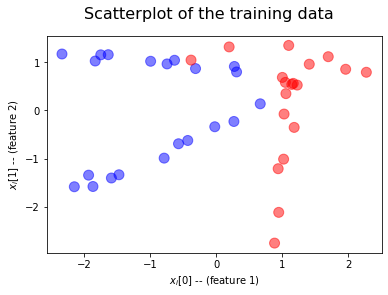

In [14]:
# вывод графика функции разброса объектов по классам
plot_dataset('Scatterplot of the training data', train_x, train_labels)

## Нейросети
<img src="https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/images/synapse-wikipedia.JPG" width="30%"/>
Искусственная нейросеть - это моделирование с той или иной точностью процессов, происходящих в мозге человека.
  * Моделируется в основном электрическая активность
  * Сильное упрощение модели, которое позволяет эффективно её вычислять



## Персептрон
<img style='margin: 10px;width: 30%;' src='https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/images/Rosenblatt-wikipedia.jpg' alt='Frank Rosenblatt' align='right'/>
Первая попытка реализовать нейронную сеть - 1957 г., Cornell Aeronautical Laboratory, Frank Rosenblatt. 

Реализация "в железе"

Цель - распознавание образов

Один нейрон, 400 входов от изображения 20x20, двоичный выход

## Персептрон

<img style='margin: 10px;width:30%' src='https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/images/Mark_I_perceptron_wikipedia.jpg' align='right' alt='The Mark 1 Perceptron' />

New York Times так об этом писала:

> the embryo of an electronic computer that [the Navy] expects will be able to walk, talk,
> see, write, reproduce itself and be conscious of its existence.

В основе - работы Warren McCullock и Walter Pitts 1943 года

Threshold Logic Unit - первая модель искусственного нейрона

## Мат.модель персептрона

На вход подаётся вектор $\mathbf{x}$, в этом случае выходное значение вычисляется как:

$$y(\mathbf{x}) = f(\mathbf{w}^{\mathrm{T}}\mathbf{x})$$

где $\mathbf{w}$ - вектор весов, $f$ - пороговая функция вида
$$
f(x) = \begin{cases}
         +1 & x \geq 0 \\
         -1 & x < 0
       \end{cases} \\
$$

## Алгоритм обучения

Для работы персептрона необходимо найти веса $\mathbf{w}$. Для этого мы используем и минимизируем **критерий персептрона**:

$$E(\mathbf{w}) = -\sum_{n \in \mathcal{M}}\mathbf{w}^{\mathrm{T}}\mathbf{x}_{n}t_{n}$$
 
  * $t_{n} \in \{-1, +1\}$ для отрицательных и положительных примеров соответственно
  * $\mathcal{M}$ - множество неправильно классифицированных примеров
  
Для обновления весов на каждом примере мы можем использовать градиент этой функции:

$$\mathbf{w}^{\tau + 1}=\mathbf{w}^{\tau} - \eta \nabla E(\mathbf{w}) = \mathbf{w}^{\tau} + \eta \mathbf{x}_{n} t_{n}$$

где $\eta$ - коэффициент, показывающий скорость обучения, $\tau\in\mathbb{N}$ - номер шага алгоритма

In [25]:
# получение массива объектов с позитивными выходами:
# [признаки объекта, 1 в качестве ответа]
pos_examples = np.array([ [t[0],t[1],1] for i,t in enumerate(train_x) 
                          if train_labels[i]>0])
print(f'Объекты обучающей выборки с положительными ответами:\n {pos_examples}')
print(f'Количество объектов с позитивными выходами: {len(pos_examples)}')

Объекты обучающей выборки с положительными ответами:
 [[ 1.40730345  0.96076369  1.        ]
 [ 0.93604654 -1.21023726  1.        ]
 [ 1.14241457  0.54125196  1.        ]
 [ 1.05358338  0.34946185  1.        ]
 [ 1.69474721  1.11680841  1.        ]
 [ 0.99969018  0.68630975  1.        ]
 [ 0.88149494 -2.75583792  1.        ]
 [ 1.95863461  0.85551184  1.        ]
 [ 1.22482657  0.52690834  1.        ]
 [ 0.9444769  -2.11718011  1.        ]
 [ 1.02556074 -0.07476384  1.        ]
 [ 1.1785326  -0.35217866  1.        ]
 [ 1.09587324  1.35072696  1.        ]
 [ 2.27184391  0.79321003  1.        ]
 [ 1.04517722  0.58303899  1.        ]
 [ 1.01856434 -1.01189816  1.        ]
 [-0.38385209  1.04606736  1.        ]
 [ 1.16462278  0.56240249  1.        ]
 [ 0.19352615  1.319713    1.        ]]
Количество объектов с позитивными выходами: 19


In [26]:
# получение массива объектов с негативными выходами:
# [признаки объекта, -1 в качестве ответа]
neg_examples = np.array([ [t[0],t[1],1] for i,t in enumerate(train_x) 
                          if train_labels[i]<0])
print(f'Объекты обучающей выборки с положительными ответами:\n {neg_examples}')
print(f'Количество объектов с негативными выходами: {len(neg_examples)}')

Объекты обучающей выборки с положительными ответами:
 [[-1.59004283 -1.4035089   1.        ]
 [-1.75119054  1.15537632  1.        ]
 [ 0.26569116 -0.22919697  1.        ]
 [ 0.66456389  0.13812476  1.        ]
 [-1.93548727 -1.34450483  1.        ]
 [ 0.30602264  0.80005223  1.        ]
 [-0.99572659  1.02172065  1.        ]
 [-0.79088467 -0.99048734  1.        ]
 [-0.63374478  1.04249084  1.        ]
 [-2.33858466  1.17265296  1.        ]
 [-1.83530986  1.0266217   1.        ]
 [-2.15161228 -1.58509588  1.        ]
 [ 0.27290222  0.91360879  1.        ]
 [-1.86928844 -1.5799222   1.        ]
 [-0.02416015 -0.33862698  1.        ]
 [-0.3154808   0.87001789  1.        ]
 [-1.63800073  1.15858471  1.        ]
 [-0.74688709  0.96638048  1.        ]
 [-0.57342982 -0.69165093  1.        ]
 [-1.47549462 -1.33614898  1.        ]
 [-0.43315604 -0.62381458  1.        ]]
Количество объектов с негативными выходами: 21


**[numpy.dot()](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)** - скалярное произведение векторов

```python
# код не совсем правильный
# обучение модели
# positive_examples - обучающая выборка с положительными выходами
# negative_examples - обучающая выборка с отрицательными выходами
# num_iterations - количество итераций обучения
def train(positive_examples, negative_examples, num_iterations = 100):
    # начальная инициализация весов
    weights = [0,0,0]
    
    # цикл обечения по количеству итераций
    for i in range(num_iterations):
        # выбор случайного объекта из каждой выборки
        pos = random.choice(positive_examples)
        neg = random.choice(negative_examples)

        # скалярное произведение векторов (вектор признаков объектов с положительными выходами на вектор весов)
        z = np.dot(pos, weights)   
        
        # увеличение весов на 1
        if z < 0:
            weights = weights + weights.shape
        
        # скалярное произведение векторов (вектор признаков объектов с отрицательными выходами на вектор весов)
        z  = np.dot(neg, weights)
        
        # уменьшение весов на 1
        if z >= 0:
            weights = weights - weights.shape

    # возвращаем веса
    return weights
```

**[numpy.zeros()](https://numpy.org/doc/stable/search.html?q=zeros)** - возвращает новый массив заданной формы и типа, заполненный нулями

**[numpy.zeros()](https://numpy.org/doc/stable/reference/generated/numpy.sum.html?)** - возвращает cуммe элементов массива по заданной оси

In [43]:
# функция обучения модели
# positive_examples - обучающая выборка с положительными выходами
# negative_examples - обучающая выборка с отрицательными выходами
# num_iterations - количество итераций обучения модели
def train(positive_examples, negative_examples, num_iterations = 100):
    # определяем размерность матрицы [признаки объектов, ответы]
    num_dims = positive_examples.shape[1]
    
    # инициализируем вектор весов
    weights = np.zeros((num_dims, 1))
    
    # получаем количество объектов из каждой выборки
    pos_count = positive_examples.shape[0]
    neg_count = negative_examples.shape[0]
    
    # частота вывода результатов (через сколько итераций выводить результат обучения модели)
    report_frequency = 10
    
    # цикл по количеству итераций
    for i in range(num_iterations):
        # случайным образом выбирается объект из каждой выборки
        pos = random.choice(positive_examples)
        neg = random.choice(negative_examples)

        # скалярное произведение вектора "позитивного" объекта на вектор весов
        z = np.dot(pos, weights)
        
        if z < 0:
            # Добавляем к весам значения принаков текущего "позитивного" объекта:
            # i-тый вес увеличивается на i-тый признак
            # последний вес увеличивается на ответ (т.е. +1)
            weights = weights + pos.reshape(weights.shape)

        # скалярное произведение вектора "негативного" объекта на вектор весов
        z  = np.dot(neg, weights)
        if z >= 0:
            # Вычитаем из весов значения принаков текущего "негативного" объекта:
            # i-тый вес уменьшается на i-тый признак
            # последний вес уменьшается на ответ (т.е. -1)
            weights = weights - neg.reshape(weights.shape)
            
        # если это итерация, при котором выводится результат
        if i % report_frequency == 0:             
            # результаты выходов: скалярное умножение матрицы обучающей выборки на вектор весов
            pos_out = np.dot(positive_examples, weights)
            neg_out = np.dot(negative_examples, weights)        
            
            # получение доли соответствия знака объектов в соответствующих выборках
            pos_correct = (pos_out >= 0).sum() / float(pos_count)
            neg_correct = (neg_out < 0).sum() / float(neg_count)
            
            # вывод:
            # Iteration - номер итерации
            # pos correct - точность определения позитивных объектов
            # neg correct - точность определения негативных объектов
            print("Iteration={}, pos correct={}, neg correct={}".format(i,pos_correct,neg_correct))

    # возращаем веса
    return weights

**[numpy.transpose()](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html)** - транспонирует (меняет оси в обратном порядке) или перемещает оси массива в указанные положения

In [44]:
# обучение модели и получение весов
wts = train(pos_examples,neg_examples)

print(f'Вывод весов:\n {wts}')
print(f'Вывод весов, после транспонирования матрицы:\n {wts.transpose()}')

Iteration=0, pos correct=0.7368421052631579, neg correct=0.8571428571428571
Iteration=10, pos correct=0.8947368421052632, neg correct=0.8571428571428571
Iteration=20, pos correct=0.8947368421052632, neg correct=0.9523809523809523
Iteration=30, pos correct=0.8947368421052632, neg correct=0.9523809523809523
Iteration=40, pos correct=0.8947368421052632, neg correct=0.8095238095238095
Iteration=50, pos correct=0.8947368421052632, neg correct=0.9047619047619048
Iteration=60, pos correct=0.9473684210526315, neg correct=0.8095238095238095
Iteration=70, pos correct=0.8947368421052632, neg correct=0.7142857142857143
Iteration=80, pos correct=0.9473684210526315, neg correct=0.7619047619047619
Iteration=90, pos correct=0.9473684210526315, neg correct=0.8571428571428571
Вывод весов:
 [[ 3.75364181]
 [ 0.021524  ]
 [-2.        ]]
Вывод весов, после транспонирования матрицы:
 [[ 3.75364181  0.021524   -2.        ]]


**[numpy.isclose()](https://numpy.org/doc/stable/reference/generated/numpy.isclose.html)** - возвращает логический массив, в котором два массива поэлементно равны в пределах допуска

**[matplotlib.pyplot.xlim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html)** - получение или установка пределов **x** текущих осей

**[matplotlib.pyplot.ylim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html)** - получение или установка пределов **y** текущих осей

**[numpy.array()](https://numpy.org/doc/stable/reference/generated/numpy.array.html)** - создание массива

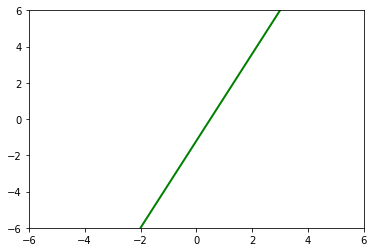

In [62]:
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.plot([-2, 3], [-6, 6], 'g', linewidth=2.0)

In [63]:
# функция вывода графика линейного классификатора
# positive_examples - выборка позитивных объектов
# negative_examples - выборка негативных объектов
# weights - веса
def plot_boundary(positive_examples, negative_examples, weights):
    # если второй вес близок нулю
    if np.isclose(weights[1], 0):
        # если первый вес близок нулю
        if np.isclose(weights[0], 0):
            # задаем границы прямой по x и y. В данном случае это диагональ квадрата
            x = y = np.array([-6, 6], dtype = 'float32')
        else:
            # задаем границы прямой по y
            y = np.array([-6, 6], dtype='float32')
            
            # масштабируем границы прямой по x по первому весу
            x = -(weights[1] * y + weights[2])/weights[0]
    else:
        # задаем границы прямой по y
        x = np.array([-6, 6], dtype='float32')
        
        # масштабируем границы прямой по y по второму весу
        y = -(weights[0] * x + weights[2])/weights[1]
    
    # задаем границы вывода графика
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)                
    
    # добавляем в виде точек разных цветов объекты разных классов
    plt.plot(positive_examples[:,0], positive_examples[:,1], 'bo')
    plt.plot(negative_examples[:,0], negative_examples[:,1], 'ro')
    
    # строим линию перехода между классами
    plt.plot(x, y, 'g', linewidth=2.0)
    
    # выводим график
    plt.show()

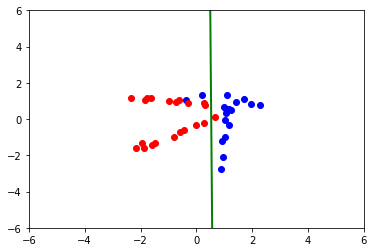

In [64]:
# вывод графика линейного классификатора
plot_boundary(pos_examples,neg_examples,wts)

## Проверяем на тестовой выборке

In [10]:
def accuracy(weights, test_x, test_labels):
    res = np.dot(np.c_[test_x,np.ones(len(test_x))],weights)
    return (res.reshape(test_labels.shape)*test_labels>=0).sum()/float(len(test_labels))

accuracy(wts, test_x, test_labels)

1.0

## Посмотрим, как меняется точность обучения

In [11]:
def train_graph(positive_examples, negative_examples, num_iterations = 100):
    num_dims = positive_examples.shape[1]
    weights = np.zeros((num_dims,1)) # инициализируем веса
    
    pos_count = positive_examples.shape[0]
    neg_count = negative_examples.shape[0]
    
    report_frequency = 15;
    snapshots = []
    
    for i in range(num_iterations):
        pos = random.choice(positive_examples)
        neg = random.choice(negative_examples)

        z = np.dot(pos, weights)   
        if z < 0:
            weights = weights + pos.reshape(weights.shape)

        z  = np.dot(neg, weights)
        if z >= 0:
            weights = weights - neg.reshape(weights.shape)
            
        if i % report_frequency == 0:             
            pos_out = np.dot(positive_examples, weights)
            neg_out = np.dot(negative_examples, weights)        
            pos_correct = (pos_out >= 0).sum() / float(pos_count)
            neg_correct = (neg_out < 0).sum() / float(neg_count)
            snapshots.append((np.copy(weights),(pos_correct+neg_correct)/2.0))

    return np.array(snapshots)

snapshots = train_graph(pos_examples,neg_examples)

def plotit(pos_examples,neg_examples,snapshots,step):
    fig = pylab.figure(figsize=(10,4))
    fig.add_subplot(1, 2, 1)
    plot_boundary(pos_examples, neg_examples, snapshots[step][0])
    fig.add_subplot(1, 2, 2)
    pylab.plot(np.arange(len(snapshots[:,1])), snapshots[:,1])
    pylab.ylabel('Accuracy')
    pylab.xlabel('Iteration')
    pylab.plot(step, snapshots[step,1], "bo")
    pylab.show()
def pl1(step): plotit(pos_examples,neg_examples,snapshots,step)

In [12]:
interact(pl1, step=widgets.IntSlider(value=0, min=0, max=len(snapshots)-1))

interactive(children=(IntSlider(value=0, description='step', max=6), Output()), _dom_classes=('widget-interact…

<function __main__.pl1(step)>

## Ограниченность персептрона

Типичный пример нерешаемой задачи - **исключающее или** (XOR problem)

|   | 0 | 1 |
|---|---|---|
| 0 | 0 | 1 | 
| 1 | 1 | 0 |

In [13]:
pos_examples_xor = np.array([[1,0,1],[0,1,1]])
neg_examples_xor = np.array([[1,1,1],[0,0,1]])

snapshots_xor = train_graph(pos_examples_xor,neg_examples_xor,1000)
def pl2(step): plotit(pos_examples_xor,neg_examples_xor,snapshots_xor,step)

In [14]:
interact(pl2, step=widgets.IntSlider(value=0, min=0, max=len(snapshots)-1))

interactive(children=(IntSlider(value=0, description='step', max=6), Output()), _dom_classes=('widget-interact…

<function __main__.pl2(step)>

## Сложный пример - MNIST

Modified National Institute of Standards and Technology

https://www.kaggle.com/c/digit-recognizer

  * Рукописные цифры, собранные с сотрудников института стандартов и учащихся, около 250 человек
  * 60000 обучающая выборка, 10000 тестовая выборка, собранная от разных групп
  * Изображения в градациях серого, 28x28

In [ ]:
!rm *.pkl
!wget https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz
!gzip -d mnist.pkl.gz

rm: cannot remove '*.pkl': No such file or directory


In [16]:
with open('mnist.pkl', 'rb') as mnist_pickle:
    MNIST = pickle.load(mnist_pickle)

[  0   0 188 255  94   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 191 250 253  93   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
1


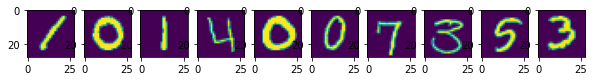

In [17]:
print(MNIST['Train']['Features'][0][130:180])
print(MNIST['Train']['Labels'][0])
features = MNIST['Train']['Features'].astype(np.float32) / 256.0
labels = MNIST['Train']['Labels']
fig = pylab.figure(figsize=(10,5))
for i in range(10):
    ax = fig.add_subplot(1,10,i+1)
    pylab.imshow(features[i].reshape(28,28))
pylab.show()

In [18]:
def set_mnist_pos_neg(positive_label, negative_label):
    positive_indices = [i for i, j in enumerate(MNIST['Train']['Labels']) 
                          if j == positive_label]
    negative_indices = [i for i, j in enumerate(MNIST['Train']['Labels']) 
                          if j == negative_label]

    positive_images = MNIST['Train']['Features'][positive_indices]
    negative_images = MNIST['Train']['Features'][negative_indices]

    fig = pylab.figure()
    ax = fig.add_subplot(1, 2, 1)
    pylab.imshow(positive_images[0].reshape(28,28), cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    ax = fig.add_subplot(1, 2, 2)
    pylab.imshow(negative_images[0].reshape(28,28), cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    pylab.show()
    
    return positive_images, negative_images

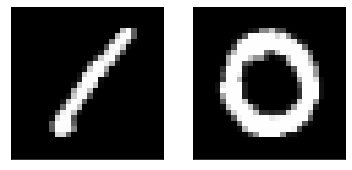

In [19]:
pos1,neg1 = set_mnist_pos_neg(1,0)

In [20]:
def plotit2(snapshots_mn,step):
    fig = pylab.figure(figsize=(10,4))
    ax = fig.add_subplot(1, 2, 1)
    pylab.imshow(snapshots_mn[step][0].reshape(28, 28), interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    pylab.colorbar()
    ax = fig.add_subplot(1, 2, 2)
    ax.set_ylim([0,1])
    pylab.plot(np.arange(len(snapshots_mn[:,1])), snapshots_mn[:,1])
    pylab.plot(step, snapshots_mn[step,1], "bo")
    pylab.show()
def pl3(step): plotit2(snapshots_mn,step)
def pl4(step): plotit2(snapshots_mn2,step)    

In [21]:
snapshots_mn = train_graph(pos1,neg1,1000)    
interact(pl3, step=widgets.IntSlider(value=0, min=0, max=len(snapshots_mn) - 1))

interactive(children=(IntSlider(value=0, description='step', max=66), Output()), _dom_classes=('widget-interac…

<function __main__.pl3(step)>

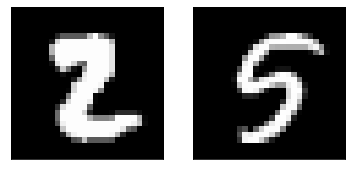

In [22]:
pos2,neg2 = set_mnist_pos_neg(2,5)

In [23]:
snapshots_mn2 = train_graph(pos2,neg2,1000)
interact(pl4, step=widgets.IntSlider(value=0, min=0, max=len(snapshots_mn2) - 1))

interactive(children=(IntSlider(value=0, description='step', max=66), Output()), _dom_classes=('widget-interac…

<function __main__.pl4(step)>

## В чем разница?

Почему-то 1 и 0 разделяются намного лучше, чем 2 и 5. 

Для понимания причины, используем [метод главных компонент](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82).

**Идея**: выделяем из множества входных фич (784 шт.) подмножество меньшей размерности, которое позволяет максимально репрезентативно разделить множества примеров.

In [31]:
from sklearn.decomposition import PCA

def pca_analysis(positive_label, negative_label):
    positive_images, negative_images = set_mnist_pos_neg(positive_label, negative_label)
    M = np.append(positive_images, negative_images, 0)

    mypca = PCA(n_components=2)
    mypca.fit(M)
    
    pos_points = mypca.transform(positive_images[:200])
    neg_points = mypca.transform(negative_images[:200])

    pylab.plot(pos_points[:,0], pos_points[:,1], 'bo')
    pylab.plot(neg_points[:,0], neg_points[:,1], 'ro')

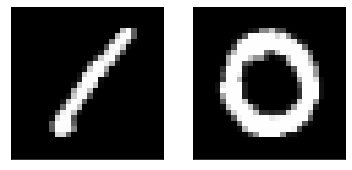

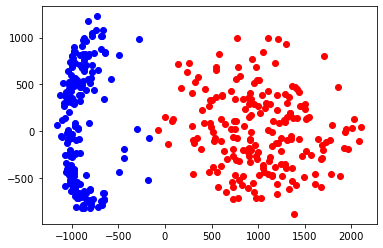

In [32]:
pca_analysis(1,0)

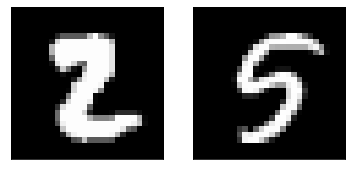

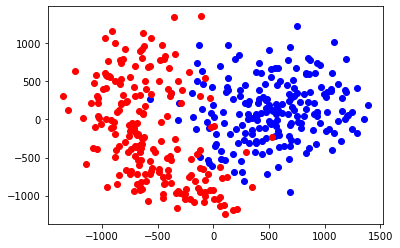

In [33]:
pca_analysis(2,5)

## Выводы

 * Мы научились создавать простейшую конфигурацию нейросети - однослойный персептрон
 * При этом такие сети уже могут решать весьма нетривиальные задачи
 * Тем не менее, однослойный персептрон по сути эквивалентен логистической регрессии, т.е. класс эффективно решаемых задач ограничен
 * В пространстве состояний однослойный персептрон может разделить два класса объектов гиперплоскостью